In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mne
from moabb.datasets import Cattan2019_VR
from moabb.paradigms import P300


# from mne import Epochs, compute_raw_covariance, compute_covariance
# from mne.preprocessing import Xdawn

from power import field_root_mean_square, plot_fmrs
from data_processing import get_clean_epochs, Filter

In [3]:
dataset=Cattan2019_VR()
dataset.subject_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [4]:
epochs = get_clean_epochs(dataset, subjects_list=[1], reject_value = 100).apply_function(lambda x:x*1e-6) #Cattan is in V and MNE standard is microV

/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Targ

Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding metadata with 3 columns
Adding m

/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/datasets/preprocessing.py:279: UserWarning: warnEpochs <Epochs | 12 events (all good), 0 – 1 s (baseline off), ~790 kB, data loaded,
 'Target': 2
 'NonTarget': 10>
  warn(f"warnEpochs {epochs}")
/nethome/costamai/myenvs/main_env/lib/python3.10/site-packages/moabb/paradigms/base.py:350: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  

Dataset median value:  0.004378231920972975
    Rejecting  epoch based on EEG : ['Fc6']
    Rejecting  epoch based on EEG : ['Fc6']
    Rejecting  epoch based on EEG : ['Fc6']
3 bad epochs dropped


In [5]:
epochs.get_data()

array([[[ 3.42245405e-06,  3.16889912e-06,  2.97100479e-06, ...,
         -1.19310796e-07, -4.93268167e-07, -8.29382195e-07],
        [-6.14192445e-07, -5.02424760e-07, -3.21730576e-07, ...,
          6.09625490e-07,  1.92320072e-07, -2.03182319e-07],
        [ 1.79736930e-06,  1.41013928e-06,  1.12978452e-06, ...,
         -2.60869586e-06, -2.59225789e-06, -2.58833987e-06],
        ...,
        [-2.94607419e-06, -2.80066988e-06, -2.58358221e-06, ...,
          8.21405187e-06,  7.76521632e-06,  7.25272659e-06],
        [-5.84516146e-06, -5.60805874e-06, -5.20178138e-06, ...,
          7.55051714e-06,  7.43800720e-06,  7.33791582e-06],
        [-6.70335933e-06, -6.69306412e-06, -6.47839642e-06, ...,
          6.47914831e-06,  6.33903317e-06,  6.23840949e-06]],

       [[-7.57661259e-06, -7.17863997e-06, -6.69929252e-06, ...,
         -9.89897804e-06, -1.03161690e-05, -1.07178072e-05],
        [-9.71877729e-06, -9.17446491e-06, -8.54693040e-06, ...,
         -7.32724799e-06, -8.09177318e

Using matplotlib as 2D backend.


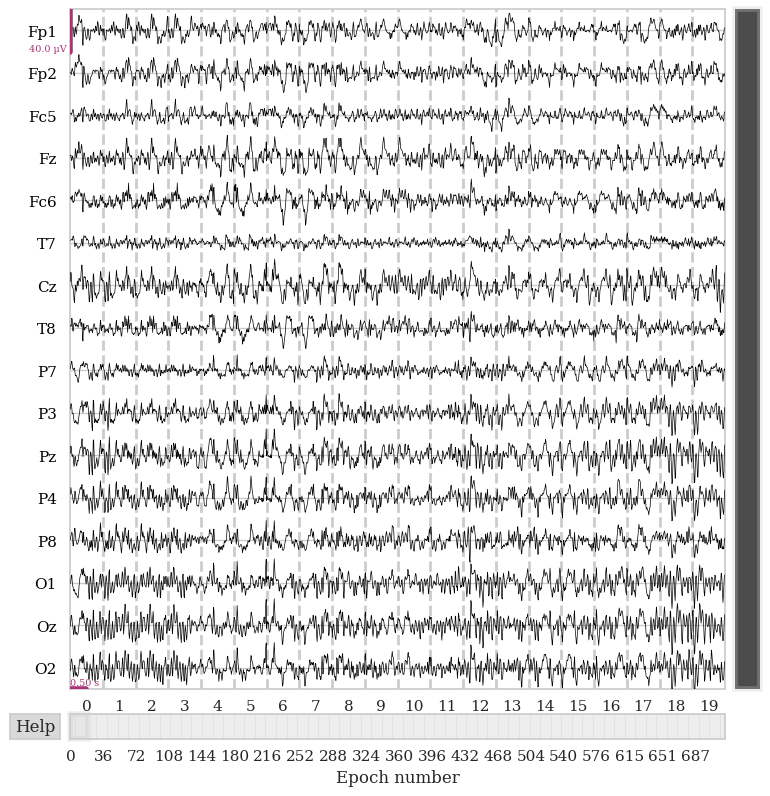

In [6]:
epochs.plot();

No projector specified for this dataset. Please consider the method self.add_proj.


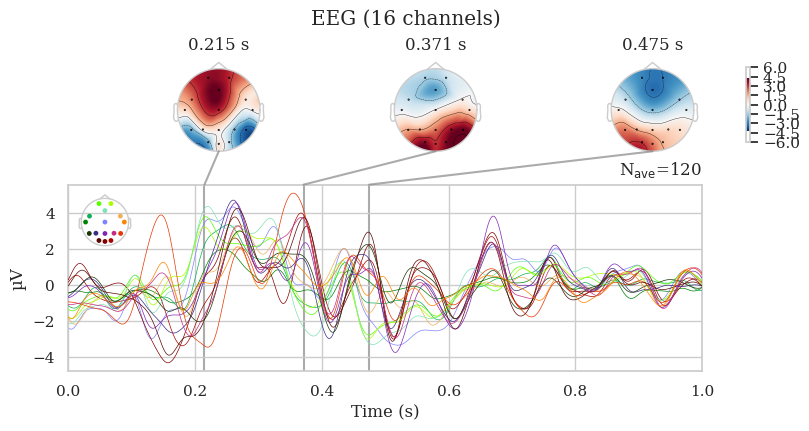

In [16]:
epochs["Target"].average().plot_joint();

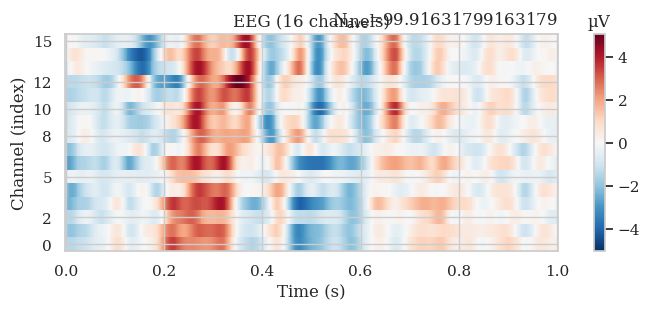

In [8]:
combined_evoked = mne.combine_evoked([epochs["Target"].average(), epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();


<class 'mne.epochs.EpochsArray'>


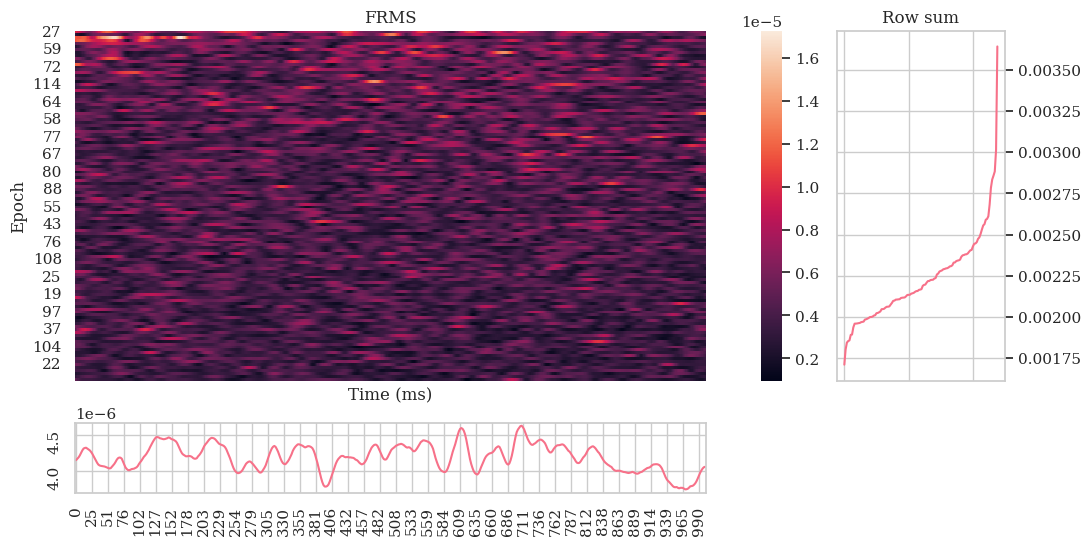

In [9]:
frms = field_root_mean_square(epochs["Target"])
plot_fmrs(frms)

### Apply Spatial Filter

In [10]:
spatial_filter = Filter(epochs=epochs, p=2)
spatial_filter.fit(class_="Target")
filtered_epochs = spatial_filter.apply(epochs=epochs)

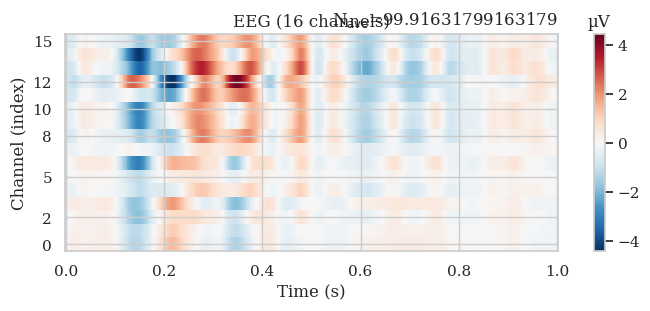

In [11]:
combined_evoked = mne.combine_evoked([filtered_epochs["Target"].average(), filtered_epochs["NonTarget"].average()], [1,-1])
combined_evoked.plot_image();

<class 'mne.epochs.EpochsArray'>


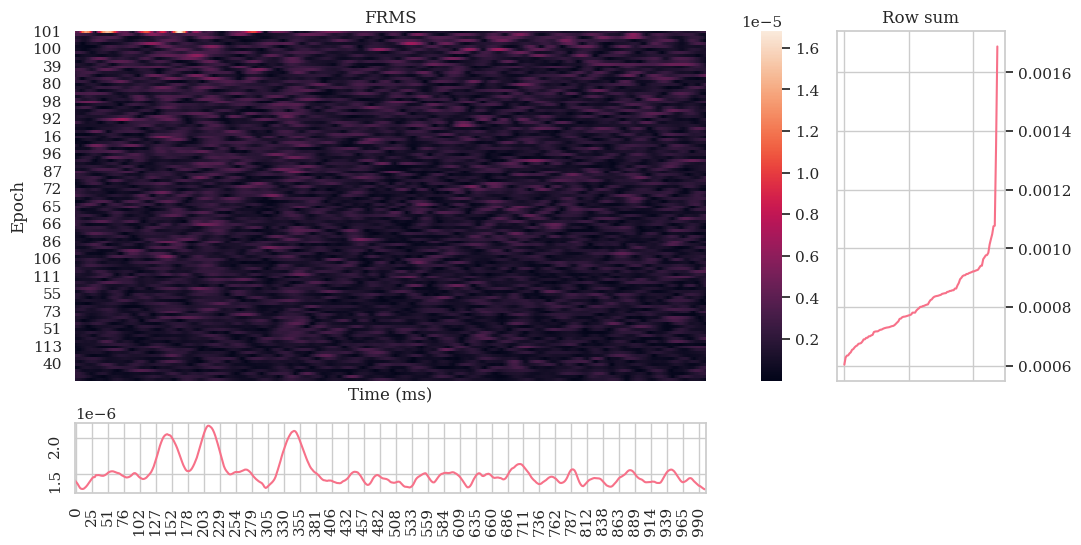

In [12]:
frms = field_root_mean_square(filtered_epochs["Target"])
plot_fmrs(frms)

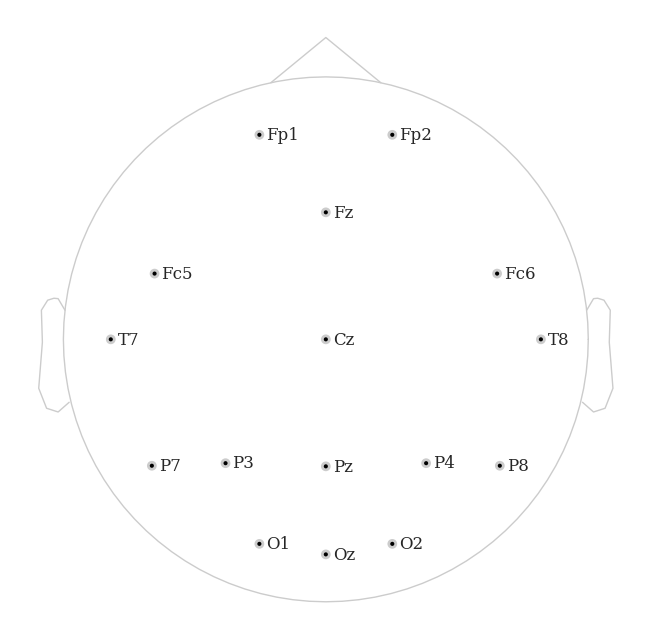

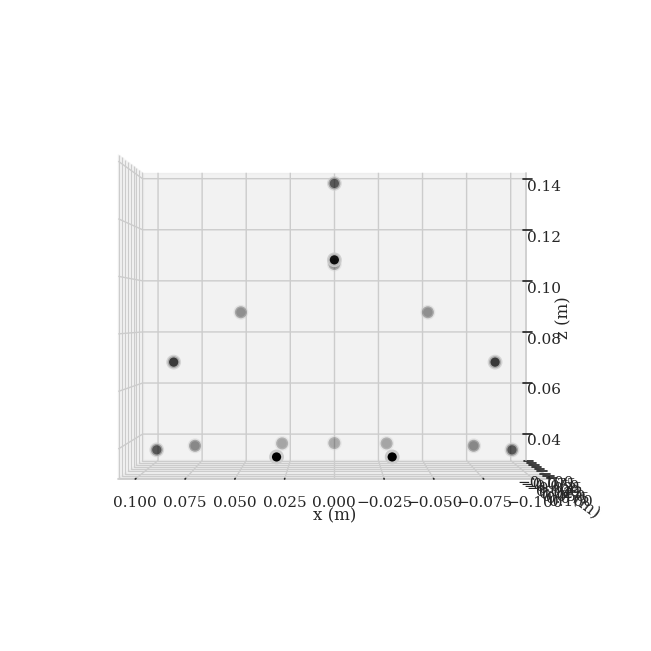

In [13]:
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
epochs.set_montage(easycap_montage,on_missing='warn', match_case=False)
epochs.plot_sensors(show_names=True)
fig = epochs.plot_sensors("3d")


In [14]:
epochs.get_data()

array([[[ 3.42245405e-06,  3.16889912e-06,  2.97100479e-06, ...,
         -1.19310796e-07, -4.93268167e-07, -8.29382195e-07],
        [-6.14192445e-07, -5.02424760e-07, -3.21730576e-07, ...,
          6.09625490e-07,  1.92320072e-07, -2.03182319e-07],
        [ 1.79736930e-06,  1.41013928e-06,  1.12978452e-06, ...,
         -2.60869586e-06, -2.59225789e-06, -2.58833987e-06],
        ...,
        [-2.94607419e-06, -2.80066988e-06, -2.58358221e-06, ...,
          8.21405187e-06,  7.76521632e-06,  7.25272659e-06],
        [-5.84516146e-06, -5.60805874e-06, -5.20178138e-06, ...,
          7.55051714e-06,  7.43800720e-06,  7.33791582e-06],
        [-6.70335933e-06, -6.69306412e-06, -6.47839642e-06, ...,
          6.47914831e-06,  6.33903317e-06,  6.23840949e-06]],

       [[-7.57661259e-06, -7.17863997e-06, -6.69929252e-06, ...,
         -9.89897804e-06, -1.03161690e-05, -1.07178072e-05],
        [-9.71877729e-06, -9.17446491e-06, -8.54693040e-06, ...,
         -7.32724799e-06, -8.09177318e

In [15]:
filtered_epochs.get_data()

array([[[-2.14842661e-07, -2.20514532e-07, -2.23686000e-07, ...,
          1.36538035e-08,  1.67023272e-07,  3.07687780e-07],
        [-1.88057584e-07, -1.96903370e-07, -2.03054447e-07, ...,
          2.35083370e-07,  3.52951025e-07,  4.53145425e-07],
        [-2.42930797e-07, -2.71694162e-07, -2.94716078e-07, ...,
          1.30039961e-06,  1.37948746e-06,  1.40647649e-06],
        ...,
        [-2.79576732e-07, -3.84955651e-07, -4.74303081e-07, ...,
          5.65194500e-06,  5.43790406e-06,  5.04188260e-06],
        [-4.86309380e-07, -5.78186398e-07, -6.54098009e-07, ...,
          4.57504018e-06,  4.58860261e-06,  4.43996823e-06],
        [-6.80645276e-08, -1.31195476e-07, -1.85537095e-07, ...,
          3.53058756e-06,  3.32030312e-06,  3.00244504e-06]],

       [[ 6.57335850e-07,  8.84621631e-07,  1.09515601e-06, ...,
         -1.62921671e-07, -2.59550979e-07, -3.61423195e-07],
        [ 6.21606495e-07,  8.08224300e-07,  9.79061452e-07, ...,
         -5.46215103e-07, -6.49532079e